# 다차원 텐서 (다차원 배열)

In [2]:
import numpy as np

## 다차원 배열의 계산 복습

In [3]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[7,8,9],[10,11,12]])

add_result = A + B
add_result

vec = np.array([1,2,3])
add_result2 = A + vec   # 브로드 캐스팅
print(add_result,'\n',add_result2)

dot_result = A.dot(B.T) # T : 전치행렬
print(dot_result)

[[ 8 10 12]
 [14 16 18]] 
 [[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


# 다차원 배열의 계산으로 순전파 구현

In [4]:
# -- 단층 퍼셉트론
# 입력 데이터
X = np.random.randn(4,5)

# 가중치
W = np.random.randn(5,3)    # 5개의 입력(feature), 3개의 뉴런으로 구성된 레이어

# 편향
b = np.random.randn(1,3)

# 선형계산 (W*X + b)
z = np.dot(X,W) + b

# ReLU(활성화 함수)
result = np.maximum(0,z)
print(result)

[[0.         0.81252649 0.        ]
 [0.87027511 0.         0.        ]
 [0.63509495 3.00931885 4.41594548]
 [3.5073596  0.         2.46817539]]


# 다층 퍼셉트론


In [5]:
X = np.random.randn(6,10)

# 은닉층 : 10개의 입력 -> 8개의 뉴런
W1 = np.random.randn(10,8)
b1 = np.random.randn(1,8)

# 출력층 : 8개의 입력 -> 4개의 클래스
W2 = np.random.randn(8,4)
b2 = np.random.randn(1,4)

#은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.tanh(np.dot(X,W1)) + b1

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(z1, W2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
result = exp_z/np.sum(exp_z, axis=1, keepdims=True)
print(result)


[[1.36519464e-01 4.70508089e-01 1.01287300e-02 3.82843716e-01]
 [7.25916418e-06 9.97936733e-01 4.14770928e-04 1.64123733e-03]
 [2.43291503e-05 9.93702725e-01 1.10039320e-03 5.17255220e-03]
 [2.23833690e-05 9.85264143e-01 1.34041300e-03 1.33730603e-02]
 [3.66470886e-06 9.92790152e-01 6.22324441e-04 6.58385845e-03]
 [1.79808861e-05 9.74283150e-01 6.55567014e-04 2.50433016e-02]]


# 이미지 데이터 예시


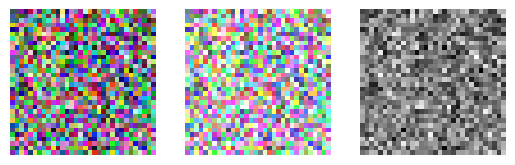

In [9]:
import matplotlib.pyplot as plt

batch_size = 5
channels = 3
height = 32
width = 32

# PyTorch 프레임워크에서는 이미지 데이터를 (채널, 높이, 너비)순서로 저장
# matplotlib.pyplot.imshow()는 (높이,너비,채널) 순서로 기대
# 따라서 transpose()를 이용해 축의 순서를 재배열 
images = np.random.rand(batch_size,channels,height,width)

bright_images = np.clip(images + 0.2,0,1) 

graty_images = np.mean(images, axis=1)

images_for_display = images[0].transpose(1,2,0)
bright_images_display = bright_images[0].transpose(1,2,0)

plt.subplot(1,3,1)
plt.imshow(images_for_display)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(graty_images[0], cmap='gray')
plt.axis('off')

plt.show()